# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

<div class="alert alert-danger">
Importamos las funciones seno y coseno, así como la librería para utilizar los símbolos matemáticos
</div>

In [195]:
from sympy import symbols, Symbol
from sympy import *
from sympy import sin, cos
from sympy.interactive import printing

<div class="alert alert-info">
a) Creamos los símbolos y las funciones, para poder declarar y, z y w
</div>

In [196]:
x = Symbol('x')
y1 = Symbol('y')
y, z= symbols('y z', cls=Function)
y=cos(x)
z=sin(x)
w=1/(z+cos(2*x))

<div class="alert alert-info">
Imprimo las funciones en celdas diferentes apra que se van en formato bonito xd sino se ven normales
</div>

In [197]:
y

cos(x)

In [198]:
z

sin(x)

In [199]:
w

1/(sin(x) + cos(2*x))

<div class="alert alert-info">
b) Creamos g(x)
</div>

In [200]:
g=y*z
g

sin(x)*cos(x)

<div class="alert alert-info">
Derivamos usando .diff
</div>

In [201]:
g.diff(x)

-sin(x)**2 + cos(x)**2

<div class="alert alert-info">
c) Importamos la librería de ploteo de sympy y ploteamos w en el intervalo 0,1
</div>

In [202]:
from sympy.plotting import plot

In [203]:
plot?

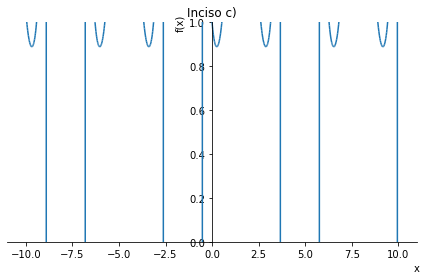

In [204]:
plot(w,ylim=(0,1),title="Inciso c)")

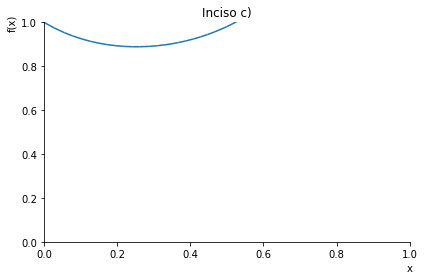

In [205]:
plot(w,xlim=(0,1),ylim=(0,1),title="Inciso c)") #pongo igual dominion (0.1) por si las moscas

<div class="alert alert-info">
d)
</div>

### Indefinida

In [206]:
integrate(g, x)

sin(x)**2/2

### Evaluada de 0,1

In [207]:
integrate(g, x, (x, 0, 1))

-sin(1)*cos(1)/4 + 1/4

<div class="alert alert-info">
e) Importamos libería de limit para hacer límites y de una vez series para el sig ejercicio
</div>

In [208]:
from sympy import limit, series

In [209]:
limit?

#### de y(x)

In [210]:
limit(y, x, 0)

1

#### de z(x)

In [211]:
limit(z, x, 0)

0

#### de g(x)

In [212]:
limit(g, x, 0)

0

#### de w(x)

In [213]:
limit(w, x, 0)

1

<div class="alert alert-info">
f) ya con la librería, dado que no menciona el ejercicio dónde evaluar la serie, tomaremos un punto arbitrario c
</div>

In [214]:
c = Symbol('c')

In [215]:
series?

### Para y

In [216]:
y.series(x,c,n=3)

cos(c) - (-c + x)*sin(c) - (-c + x)**2*cos(c)/2 + O((-c + x)**3, (x, c))

### Para z

In [217]:
z.series(x,c,n=3)

sin(c) + (-c + x)*cos(c) - (-c + x)**2*sin(c)/2 + O((-c + x)**3, (x, c))

### Problema 2

In [256]:
import numpy as np
import matplotlib.pyplot as plt

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

<div class="alert alert-info">
Utilizamos la función vista en clase para Runge-Kutta y los datos utilizados para el método de euler
</div>

In [287]:
N = 1000 # número de pasos

tau = 3.0 # tiempo de la simulación
 
dt = tau/(float)(N-1)  # tamaño del paso

<div class="alert alert-info">
Generamos un intervalo hasta N separado uniformemente y generamos un array que será el de las soluciones
</div>

In [283]:
time = np.linspace(0, tau, N)
s=np.zeros([N,3]) #solucion para fx,fy,fz
s[0,0]=0
s[0,1]=0
s[0,2]=0

<div class="alert alert-info">
Insertamos las ecuaciones en la funcion de la clase, para que nos regrese un array con la solucion de c/u
</div>

In [285]:
#uso s pq usaba y y me corría la y del ejercicio pasado
def RK2(s, t, dt, derivadas):
    x, y, z = 0,0,0 
    fx = -y-z
    fy = x+(0.13)*y
    fz = (0.2)+z*(x-(6.5))
    return array([fx, fy, fz], float)

In [286]:
#utilizo esta funcion como referencia
    def integrate(self, num_steps, t_i, t_f, method):
        
        self.tau, self.dt = np.linspace(t_i, t_f, num=num_steps, retstep=True)
        self.trajectory = np.zeros([num_steps, 2])
        self.trajectory[0,0] = self.theta_i
        self.trajectory[0,1] = self.omega_i
        
        for j in range(N-1):
            self.trajectory[j+1] = method(self.trajectory[j], self.tau[j], self.dt, self.dynamics)

In [301]:
def ia(s):
    for j in range(N-1):
            s[j+1] = RK2(s[j], time[j], dt, np.array([0,0,0])) #aquí me trabe pq nos abía que usar como derivadas
    return s

In [302]:
r=ia(s)

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

AttributeError: 'numpy.ndarray' object has no attribute 's'

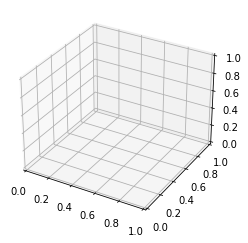

In [303]:
# and plot it
fig = pylab.figure()
ax = pylab.axes(projection="3d")
ax.plot3D(r.s[0,:], r.s[1,:], r.s[2,:], 'blue')
pylab.show()